In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('results_MPI_us-east-1.csv')

df_filtered = df[ (df['Status'] == 'SUCCESS') & (~df['Time_in_Seconds'].isnull())]

cg = df_filtered[ df_filtered['Algorithm_Name'].str.contains('cg')]
cg_filtered = cg[['Instance','Price','Time_in_Seconds','Mops_Total','Cores']]

mg = df_filtered[ df_filtered['Algorithm_Name'].str.contains('mg')]
mg_filtered = mg[['Instance','Price','Time_in_Seconds','Mops_Total','Cores']]

ft = df_filtered[ df_filtered['Algorithm_Name'].str.contains('ft')]
ft_filtered = ft[['Instance','Price','Time_in_Seconds','Mops_Total','Cores']]

In [55]:
print(cg_filtered)

        Instance    Price  Time_in_Seconds  Mops_Total  Cores
0   c7a.12xlarge  2.46336            92.72     1546.05    1.0
1   c7a.12xlarge  2.46336            42.03     3410.70    2.0
2   c7a.12xlarge  2.46336            22.26     6440.48    4.0
3   c7a.12xlarge  2.46336            11.70    12256.62    8.0
4   c7a.12xlarge  2.46336             6.96    20587.83   16.0
15  c5a.12xlarge  1.84800           122.18     1173.22    1.0
16  c5a.12xlarge  1.84800            61.45     2332.59    2.0
17  c5a.12xlarge  1.84800            30.77     4658.48    4.0
18  c5a.12xlarge  1.84800            14.61     9811.42    8.0
19  c5a.12xlarge  1.84800            11.12    12889.48   16.0
30   c5.12xlarge  2.04000           270.23      530.47    1.0
31   c5.12xlarge  2.04000            98.24     1459.18    2.0
32   c5.12xlarge  2.04000            50.66     2829.46    4.0
33   c5.12xlarge  2.04000            13.29    10786.89    8.0
34   c5.12xlarge  2.04000             8.29    17290.60   16.0
45  c6a.

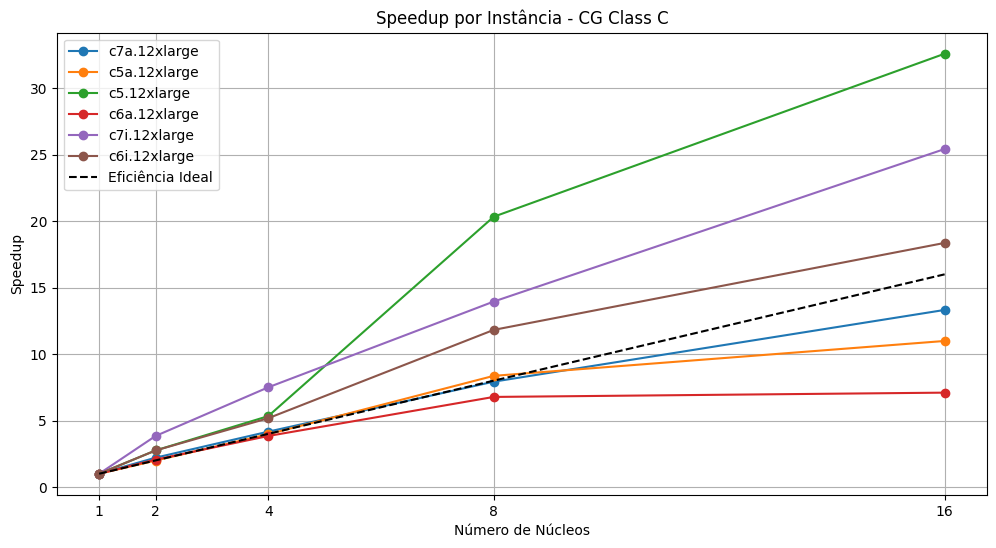

In [46]:

def calculate_speedup(df, instance):
    subset = df[df['Instance'] == instance].copy()
    min_time = subset['Time_in_Seconds'].iloc[0] 
    subset.loc[:, 'Speedup'] = min_time / subset['Time_in_Seconds']
    return subset


instances = df['Instance'].unique()


plt.figure(figsize=(12, 6))
for instance in instances:
    subset = calculate_speedup(cg_filtered, instance)
    plt.plot(subset['Cores'], subset['Speedup'], marker='o', label=instance)

max_cores = df['Cores'].max()
plt.plot([1, max_cores], [1, max_cores], 'k--', label='Eficiência Ideal')

plt.title('Speedup por Instância - CG Class C')
plt.xlabel('Número de Núcleos')
plt.ylabel('Speedup')
plt.legend()
plt.grid(True)
plt.xticks(df['Cores'].unique()) 
plt.show()

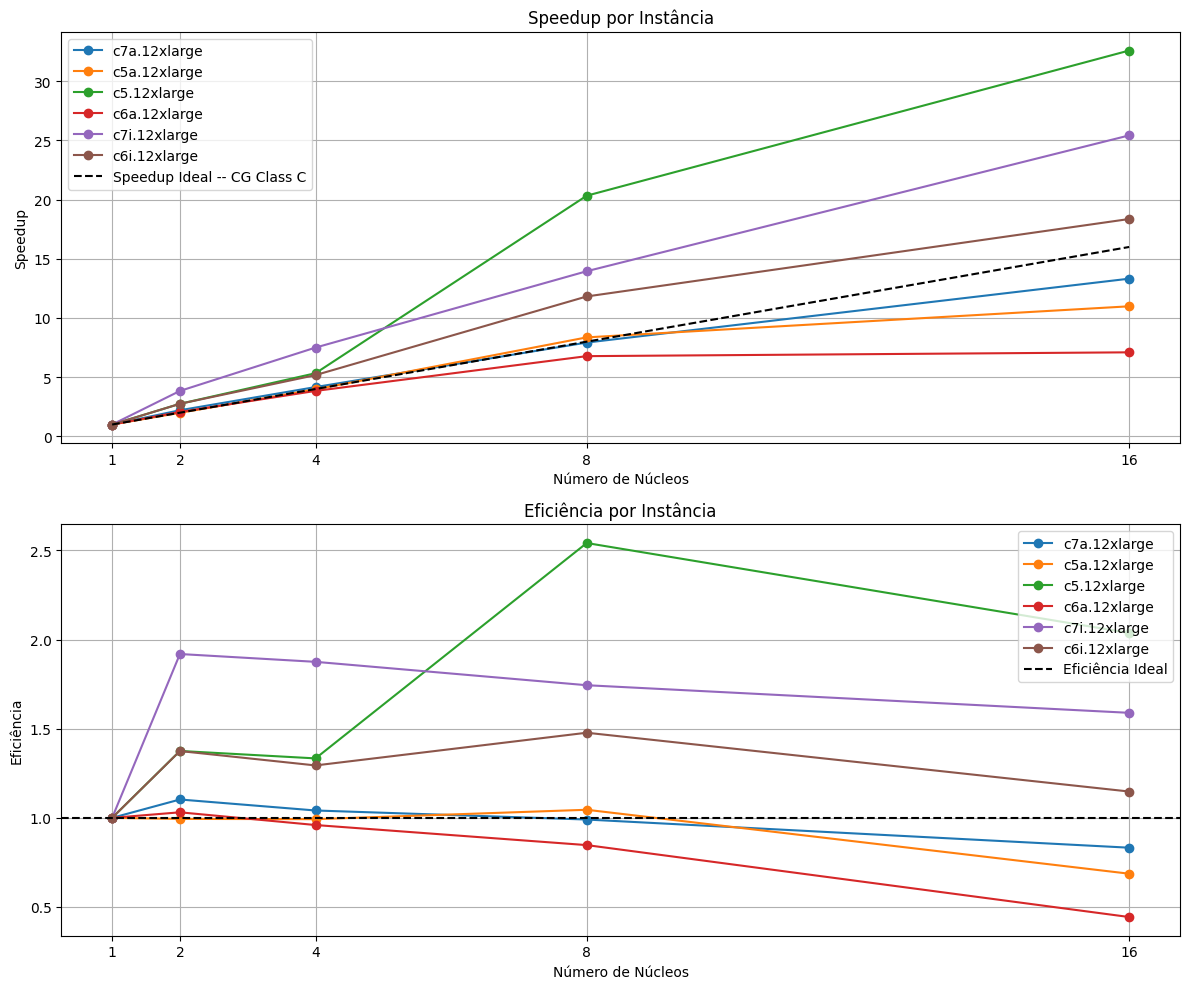

In [54]:
def calculate_speedup_efficiency(df, instance):
    subset = df[df['Instance'] == instance].copy()
    min_time = subset['Time_in_Seconds'].iloc[0]  # Assume que o tempo mínimo é com 1 core
    subset['Speedup'] = min_time / subset['Time_in_Seconds']
    subset['Efficiency'] = subset['Speedup'] / subset['Cores']
    return subset


instances = df['Instance'].unique()


fig, ax = plt.subplots(2, 1, figsize=(12, 10))

for instance in instances:
    subset = calculate_speedup_efficiency(cg_filtered, instance)
    ax[0].plot(subset['Cores'], subset['Speedup'], marker='o', label=instance)
    ax[1].plot(subset['Cores'], subset['Efficiency'], marker='o', label=instance)


ax[0].plot([1, max_cores], [1, max_cores], 'k--', label='Speedup Ideal')
ax[0].set_title('Speedup por Instância  -- CG Class C')
ax[0].set_xlabel('Número de Núcleos')
ax[0].set_ylabel('Speedup')
ax[0].legend()
ax[0].grid(True)
ax[0].set_xticks(df['Cores'].unique())


ax[1].axhline(1, color='k', linestyle='--', label='Eficiência Ideal')
ax[1].set_title('Eficiência por Instância')
ax[1].set_xlabel('Número de Núcleos')
ax[1].set_ylabel('Eficiência')
ax[1].legend()
ax[1].grid(True)
ax[1].set_xticks(df['Cores'].unique())

plt.tight_layout()
plt.show()

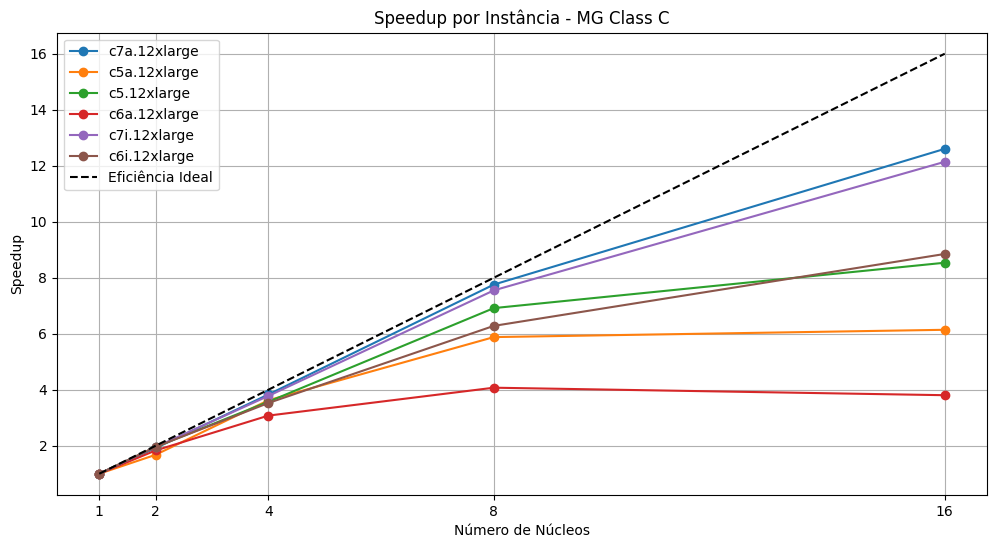

In [47]:

def calculate_speedup(df, instance):
    subset = df[df['Instance'] == instance].copy()
    min_time = subset['Time_in_Seconds'].iloc[0]  
    subset.loc[:, 'Speedup'] = min_time / subset['Time_in_Seconds']
    return subset


instances = df['Instance'].unique()


plt.figure(figsize=(12, 6))
for instance in instances:
    subset = calculate_speedup(mg_filtered, instance)
    plt.plot(subset['Cores'], subset['Speedup'], marker='o', label=instance)

max_cores = df['Cores'].max()
plt.plot([1, max_cores], [1, max_cores], 'k--', label='Eficiência Ideal')

plt.title('Speedup por Instância - MG Class C')
plt.xlabel('Número de Núcleos')
plt.ylabel('Speedup')
plt.legend()
plt.grid(True)
plt.xticks(df['Cores'].unique())  
plt.show()

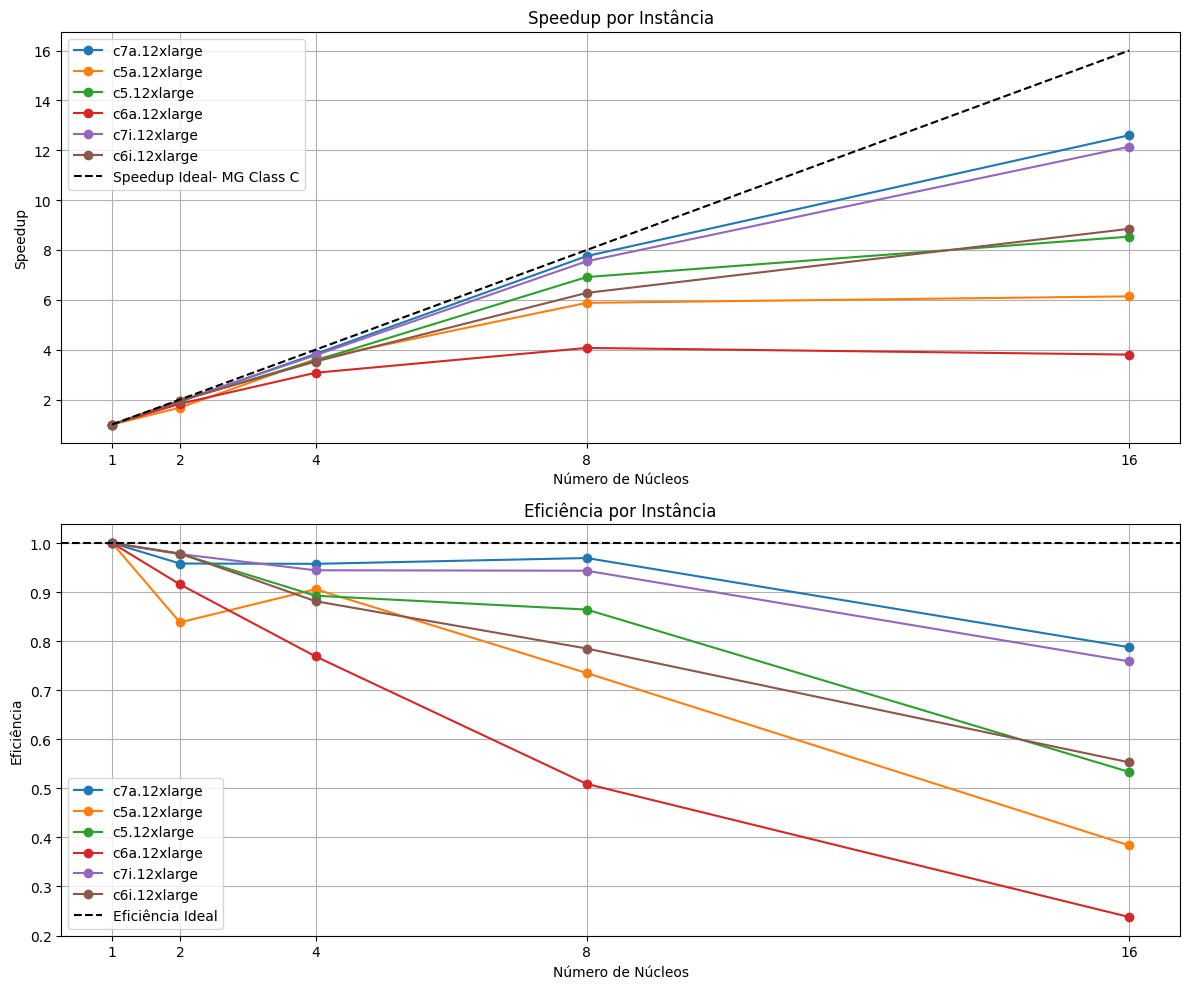

In [53]:
def calculate_speedup_efficiency(df, instance):
    subset = df[df['Instance'] == instance].copy()
    min_time = subset['Time_in_Seconds'].iloc[0]  
    subset['Speedup'] = min_time / subset['Time_in_Seconds']
    subset['Efficiency'] = subset['Speedup'] / subset['Cores']
    return subset


instances = df['Instance'].unique()


fig, ax = plt.subplots(2, 1, figsize=(12, 10))

for instance in instances:
    subset = calculate_speedup_efficiency(mg_filtered, instance)
    ax[0].plot(subset['Cores'], subset['Speedup'], marker='o', label=instance)
    ax[1].plot(subset['Cores'], subset['Efficiency'], marker='o', label=instance)


ax[0].plot([1, max_cores], [1, max_cores], 'k--', label='Speedup Ideal')
ax[0].set_title('Speedup por Instância - MG Class C')
ax[0].set_xlabel('Número de Núcleos')
ax[0].set_ylabel('Speedup')
ax[0].legend()
ax[0].grid(True)
ax[0].set_xticks(df['Cores'].unique())


ax[1].axhline(1, color='k', linestyle='--', label='Eficiência Ideal')
ax[1].set_title('Eficiência por Instância')
ax[1].set_xlabel('Número de Núcleos')
ax[1].set_ylabel('Eficiência')
ax[1].legend()
ax[1].grid(True)
ax[1].set_xticks(df['Cores'].unique())

plt.tight_layout()
plt.show()

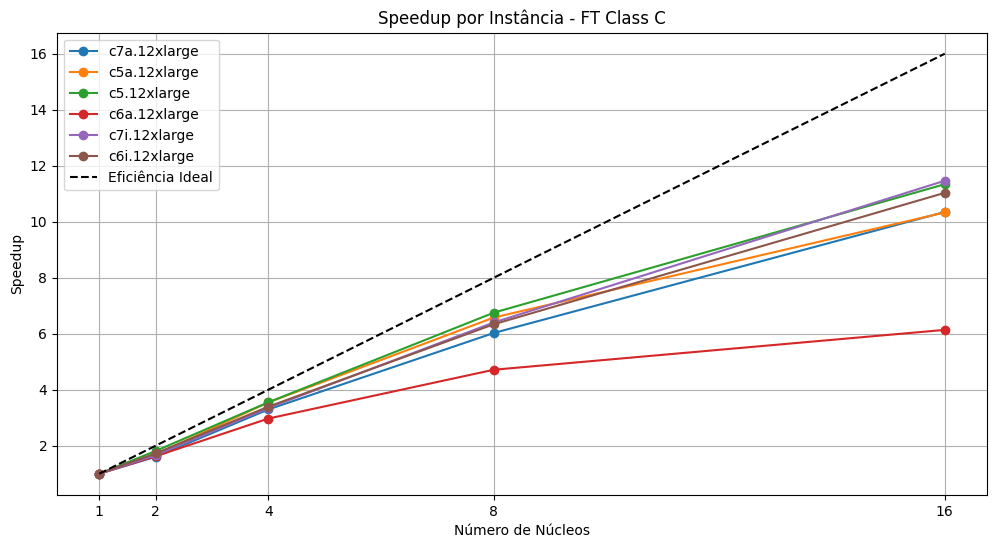

In [48]:

def calculate_speedup(df, instance):
    subset = df[df['Instance'] == instance].copy()
    min_time = subset['Time_in_Seconds'].iloc[0]  # Assume que o tempo mínimo é com 1 core
    subset.loc[:, 'Speedup'] = min_time / subset['Time_in_Seconds']
    return subset


instances = df['Instance'].unique()


plt.figure(figsize=(12, 6))
for instance in instances:
    subset = calculate_speedup(ft_filtered, instance)
    plt.plot(subset['Cores'], subset['Speedup'], marker='o', label=instance)

max_cores = df['Cores'].max()
plt.plot([1, max_cores], [1, max_cores], 'k--', label='Eficiência Ideal')

plt.title('Speedup por Instância - FT Class C')
plt.xlabel('Número de Núcleos')
plt.ylabel('Speedup')
plt.legend()
plt.grid(True)
plt.xticks(df['Cores'].unique())  # Garante que todos os núcleos possíveis sejam mostrados no eixo x
plt.show()

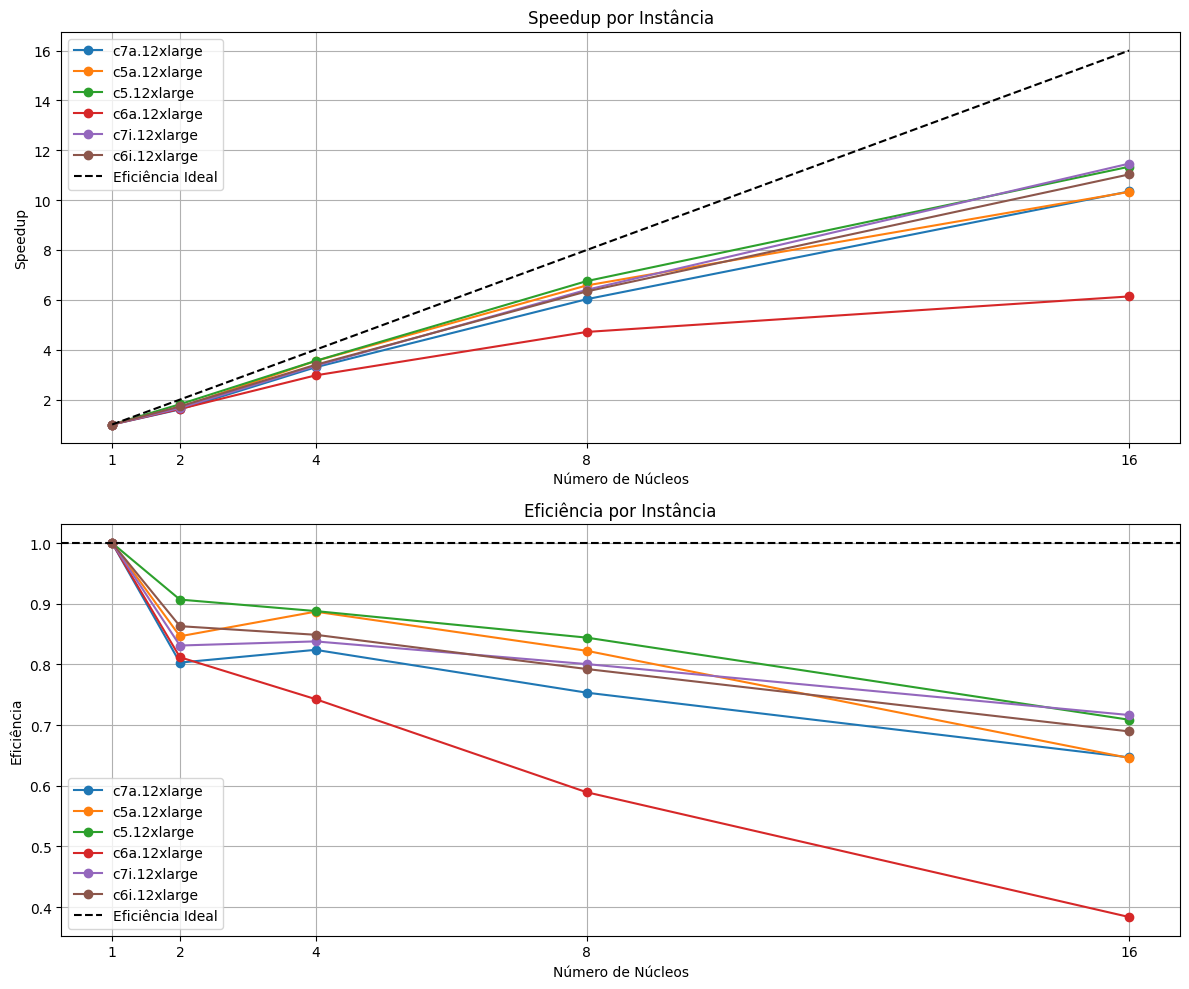

In [52]:
def calculate_speedup_efficiency(df, instance):
    subset = df[df['Instance'] == instance].copy()
    min_time = subset['Time_in_Seconds'].iloc[0]  # Assume que o tempo mínimo é com 1 core
    subset['Speedup'] = min_time / subset['Time_in_Seconds']
    subset['Efficiency'] = subset['Speedup'] / subset['Cores']
    return subset

# Instâncias únicas
instances = df['Instance'].unique()

# Plotando o speedup e eficiência para cada instância
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

for instance in instances:
    subset = calculate_speedup_efficiency(ft_filtered, instance)
    ax[0].plot(subset['Cores'], subset['Speedup'], marker='o', label=instance)
    ax[1].plot(subset['Cores'], subset['Efficiency'], marker='o', label=instance)

# Configurações para o gráfico de speedup
ax[0].plot([1, max_cores], [1, max_cores], 'k--', label='Speedup Ideal')
ax[0].set_title('Speedup por Instância - FT Class C')
ax[0].set_xlabel('Número de Núcleos')
ax[0].set_ylabel('Speedup')
ax[0].legend()
ax[0].grid(True)
ax[0].set_xticks(df['Cores'].unique())

# Configurações para o gráfico de eficiência
ax[1].axhline(1, color='k', linestyle='--', label='Eficiência Ideal')
ax[1].set_title('Eficiência por Instância')
ax[1].set_xlabel('Número de Núcleos')
ax[1].set_ylabel('Eficiência')
ax[1].legend()
ax[1].grid(True)
ax[1].set_xticks(df['Cores'].unique())

plt.tight_layout()
plt.show()